In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ks = pd.read_csv("ks-projects-201801.csv")


In [279]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_length,season,TimeOfDayOfLaunch,SeasonOfLaunch
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58,Summer,Afternoon,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59,Summer,Late Night,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44,Winter,Late Night,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29,Winter,Late Night,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55,Summer,Morning,Summer


In [49]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
campaign_length     378661 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(3), object(6)
memory usage: 46.2+ MB


In [51]:
ks['launched'] = pd.to_datetime(ks['launched'])

In [13]:
ks['deadline'] = pd.to_datetime(ks['deadline'])

In [46]:
ks['campaign_length']= (ks.deadline - ks.launched).astype(str).str.slice(0,2).astype(int)

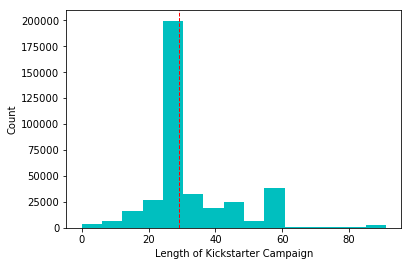

In [59]:
plt.hist(ks.campaign_length, bins = 15, color = 'c')
plt.axvline(ks.campaign_length.median(), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Length of Kickstarter Campaign')
plt.ylabel('Count')
plt.show()

In [146]:
ks.groupby(['main_category']).campaign_length.mean()
ks.groupby(['main_category']).campaign_length.std()
          

main_category
Art             13.338905
Comics          12.142851
Crafts          11.213663
Dance           13.067910
Design          10.897575
Fashion         10.943326
Film & Video    14.433437
Food            12.058595
Games           10.808805
Journalism      14.337122
Music           13.882049
Photography     13.852310
Publishing      12.353095
Technology      11.819242
Theater         14.221852
Name: campaign_length, dtype: float64

In [241]:
ks['SeasonOfLaunch'] = pd.cut(
    (ks.launched.dt.dayofyear + 11) % 366,
    [0, 91, 183, 275, 366],
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)

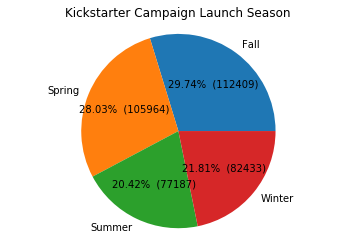

In [205]:
ks.season.value_counts(dropna=True)
values = [92820,98734,100248,86191]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie([750,707,515,550], labels = ['Fall','Spring','Summer', 'Winter'], autopct=make_autopct(values), )
plt.axis('equal')
plt.title('Kickstarter Campaign Launch Season')
plt.show()

In [242]:
ks['TimeOfDayOfLaunch'] = pd.cut(
    (ks.launched.dt.hour),
    [-1 ,5, 10, 17, 24],
    labels=['Late Night','Morning', 'Afternoon', 'Evening']
)

In [266]:
def prop_successful(x_list):
    print(x_list.value_counts().astype(int)[1])
    return;
    

time of day hour plot limited to US, mean pledged and count of projects

time of launch in the day by cateogry (any stand out values?)

Top 2-5% kickstarters a seperate analysis

quantile regression 

In [290]:
ks.groupby(['TimeOfDayOfLaunch']).usd_goal_real.median()

TimeOfDayOfLaunch
Afternoon     7000.0
Evening       5000.0
Late Night    5000.0
Morning       6000.0
Name: usd_goal_real, dtype: float64

In [291]:
ks.groupby(['TimeOfDayOfLaunch']).usd_pledged_real.median()


TimeOfDayOfLaunch
Afternoon     1215.0
Evening        500.0
Late Night     454.0
Morning        775.0
Name: usd_pledged_real, dtype: float64

In [338]:
ks.groupby(['launched.dt.hour']).

0         12
1          4
2          0
3          3
4          8
5         13
6         18
7         20
8         18
9         21
10        18
11         6
12        17
13        23
14        19
15         2
16        22
17        21
18        14
19        17
20         7
21         1
22        10
23        19
24        17
25        23
26        20
27        18
28        16
29        17
          ..
378631    19
378632    23
378633    17
378634     2
378635    22
378636    17
378637     6
378638     2
378639    13
378640    21
378641    18
378642    11
378643    20
378644     7
378645    22
378646    21
378647    17
378648    16
378649     2
378650    15
378651     1
378652    21
378653     4
378654    22
378655     3
378656     2
378657     3
378658    19
378659    18
378660     9
Name: launched, Length: 378661, dtype: int64

In [287]:
ks['year'] = ks.launched.dt.year
ks.groupby(['year']).usd_pledged_real.mean()

year
1970        0.000000
2009     2141.084357
2010     2800.482267
2011     3954.438151
2012     7833.156323
2013    10669.566477
2014     7744.495587
2015     8894.549461
2016    11488.352415
2017    11954.014957
2018      509.861210
Name: usd_pledged_real, dtype: float64

In [316]:
ks_top = ks.sort_values('usd_pledged_real', ascending = False).iloc[1:60000,]

In [319]:
ks_top.groupby(['year']).usd_pledged_real.median()

year
2009    11015.000
2010    11263.000
2011    13234.050
2012    15715.000
2013    17337.050
2014    17861.500
2015    18919.160
2016    19430.975
2017    19894.450
2018    10847.000
Name: usd_pledged_real, dtype: float64

In [328]:
ks_top.groupby(['TimeOfDayOfLaunch']).usd_pledged_real.median()


TimeOfDayOfLaunch
Afternoon     20234.00
Evening       16750.00
Late Night    15614.00
Morning       18019.28
Name: usd_pledged_real, dtype: float64

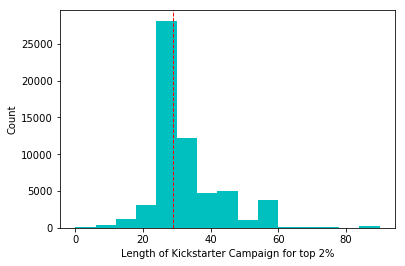

In [329]:
plt.hist(ks_top.campaign_length, bins = 15, color = 'c')
plt.axvline(ks_top.campaign_length.median(), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Length of Kickstarter Campaign for top 2%')
plt.ylabel('Count')
plt.show()

In [336]:
ks.groupby(['']).campaign_length.median()

main_category
Art             29
Comics          29
Crafts          29
Dance           29
Design          29
Fashion         29
Film & Video    29
Food            29
Games           29
Journalism      29
Music           29
Photography     29
Publishing      29
Technology      29
Theater         29
Name: campaign_length, dtype: int64

In [344]:
plt.plot(x=ks.launched.dt.hour[ks.country == 'GB'], y=

0         12
14        19
26        20
28        16
30        18
67        12
69        19
75        17
80        19
129        5
131       12
141       15
142        1
143       19
147        1
148       22
151       12
155       18
156       22
167       21
180       10
185       13
187       13
197       16
198       17
199       20
210       16
235       23
246       16
258       10
          ..
378321    10
378335    18
378344    12
378348    12
378359    22
378360     2
378363    10
378364     9
378383    16
378389    17
378403    23
378405    15
378410    11
378414    11
378421    13
378455    13
378471     1
378498    14
378506     0
378523    19
378526     7
378529    11
378530    20
378543    15
378558     7
378566    13
378586    22
378597    10
378628     1
378645    22
Name: launched, Length: 33672, dtype: int64

In [357]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_length,season,TimeOfDayOfLaunch,SeasonOfLaunch,year,hourofday
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,0.0,1533.95,58,Summer,Afternoon,Summer,2015,12
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,100.0,2421.0,30000.00,59,Summer,Late Night,Summer,2017,4
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,US,220.0,220.0,45000.00,44,Winter,Late Night,Winter,2013,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,US,1.0,1.0,5000.00,29,Winter,Late Night,Winter,2012,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,...,US,1283.0,1283.0,19500.00,55,Summer,Morning,Summer,2015,8


In [356]:
ks['hourofday'] = ks.launched.dt.hour

0         12
1          4
2          0
3          3
4          8
5         13
6         18
7         20
8         18
9         21
10        18
11         6
12        17
13        23
14        19
15         2
16        22
17        21
18        14
19        17
20         7
21         1
22        10
23        19
24        17
25        23
26        20
27        18
28        16
29        17
          ..
378631    19
378632    23
378633    17
378634     2
378635    22
378636    17
378637     6
378638     2
378639    13
378640    21
378641    18
378642    11
378643    20
378644     7
378645    22
378646    21
378647    17
378648    16
378649     2
378650    15
378651     1
378652    21
378653     4
378654    22
378655     3
378656     2
378657     3
378658    19
378659    18
378660     9
Name: hourofday, Length: 378661, dtype: int64

In [358]:
ks.loc[ks.country == 'GB',:].groupby(['hourofday']).usd_pledged_real.median()

hourofday
0      209.935
1      427.050
2      243.570
3      150.690
4      145.025
5      101.870
6      355.720
7     1323.920
8      922.140
9     1466.585
10    1178.160
11    1086.610
12     933.310
13    1009.480
14     872.540
15     635.350
16     416.290
17     438.935
18     451.290
19     394.360
20     284.090
21     348.130
22     304.450
23     219.235
Name: usd_pledged_real, dtype: float64

In [359]:
ks.loc[ks.country == 'US',:].groupby(['hourofday']).usd_pledged_real.median()

hourofday
0      500.000
1      504.000
2      520.000
3      511.000
4      521.000
5      551.000
6      899.000
7      706.000
8      700.500
9     1350.000
10     640.000
11    1026.000
12    1620.500
13    2200.000
14    2287.215
15    2244.500
16    1615.000
17    1105.000
18     903.000
19     681.000
20     575.000
21     530.000
22     485.000
23     481.000
Name: usd_pledged_real, dtype: float64

In [360]:
ks.loc[ks.country == 'NO',:].groupby(['hourofday']).usd_pledged_real.median()

hourofday
0      164.330
1       16.210
2       55.175
3       44.280
4     4355.045
5     1326.885
6        0.630
7      453.325
8       48.370
9      807.885
10     666.845
11     197.400
12     487.750
13     135.795
14      61.445
15     371.380
16      30.315
17     128.160
18     106.015
19      29.470
20     141.660
21     106.985
22      48.730
23      72.680
Name: usd_pledged_real, dtype: float64